Data loaded successfully.

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values per column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


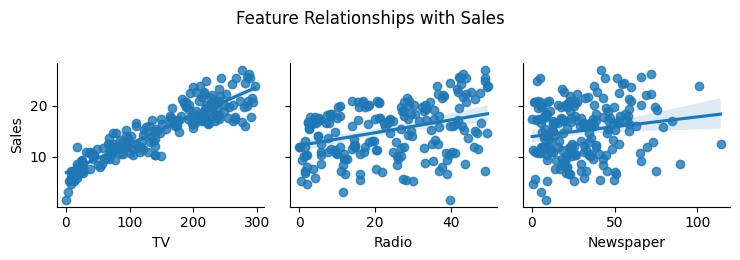

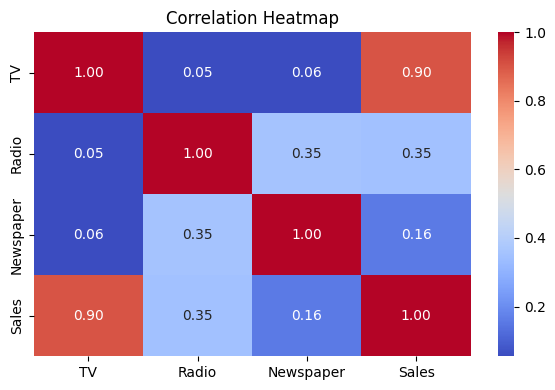


Model Performance Metrics:
Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R² Score: 0.9059011844150826


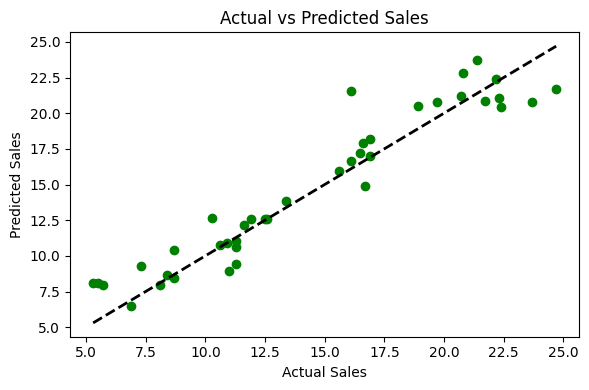


Model Coefficients:
 TV           0.054509
Radio        0.100945
Newspaper    0.004337
dtype: float64


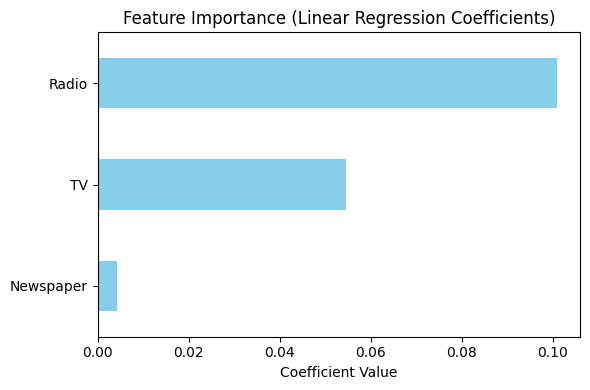

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_data(filepath):
    try:
        d = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return d
    except Exception as e:
        print("Error loading data:", e)
        return None

def explore_data(d):    
    print("\nFirst 5 rows of the dataset:")
    print(d.head())
    print("\nDataset Info:")
    print(d.info())
    print("\nMissing values per column:\n", d.isnull().sum())

def visualize_data(d):    
    sns.pairplot(d, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
    plt.suptitle("Feature Relationships with Sales", y=1.02)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

def train_model(X_train, y_train):    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    print("\nModel Performance Metrics:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual vs Predicted Sales")
    plt.tight_layout()
    plt.show()
    return y_pred

def display_coefficients(model, feature_names):    
    coefficients = pd.Series(model.coef_, index=feature_names)
    print("\nModel Coefficients:\n", coefficients)
    plt.figure(figsize=(6, 4))
    coefficients.sort_values().plot(kind='barh', color='skyblue')
    plt.title("Feature Importance (Linear Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = r'C:\Users\armaan\Downloads\advertising.csv'
    d = load_data(file_path)

    if d is not None:
        explore_data(d)
        visualize_data(d)
        X = df[['TV', 'Radio', 'Newspaper']]
        y = df['Sales']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = train_model(X_train, y_train)
        evaluate_model(model, X_test, y_test)
        display_coefficients(model, X.columns)
    else:
        print("Exiting script due to data loading error.")
